# CART - Classification and Regression Tree for classification¶

`Team:` Loading...

`Team Member:` Zhangchi Fan, Kexin Lin, Yixuan Wang, Zhecheng Zhang

`Github Link:` https://github.com/Drowsywolf/data2060_final_project

## Overview

### What is CART?

Classification and Regression Trees (CART) is a versatile and widely used supervised machine learning algorithm developed by Breiman et al. in 1984. CART constructs a binary decision tree by recursively partitioning the feature space. While CART is applicable to both classification and regression tasks, this project focuses exclusively on its application for **classification**.

In the context of classification, CART aims to create a model that predicts the categorical target variable by learning decision rules inferred from the input features.

### How CART Works for Classification

 - **Tree Construction**:
    - Splitting Criteria: CART employs *Gini impurity* to determine the best feature and threshold to split the data at each node. The goal is to maximize the purity of the child nodes compared to the parent node.
       - Gini Impurity: Measures the probability of misclassifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the subset.
    - Recursive Partitioning: Starting from the root node, CART recursively splits the dataset into subsets based on the chosen feature and threshold, creating internal nodes. This process continues until a stopping criterion is met (e.g., maximum tree depth, minimum samples per leaf).
   
 - **Tree Pruning**:
    - To prevent overfitting, CART may implement pruning strategies such as pre-pruning (e.g., limiting the maximum depth of the tree) or post-pruning (e.g., removing branches that have little importance).

 - **Prediction**:
    - For classification, predictions are made by traversing the tree from the root to a leaf node based on the input features. The class label of the leaf node is assigned as the predicted class for the input instance.

### Advantages of CART for Classification

 - **Interpretability and Visualization**: The tree structure is intuitive and can be visualized, making it straightforward to interpret how decisions are made. Each decision path can be easily followed, providing clear insights into the model's reasoning.

 - **Handling Various Data Types**: CART can handle both numerical and categorical data without the need for extensive preprocessing or feature scaling.

 - **Flexibility**: Being a non-parametric method, CART does not assume any underlying distribution of the data, allowing it to model complex relationships.

 - **Feature Selection**: The algorithm inherently performs feature selection by choosing the most informative features for splits, reducing the need for manual feature engineering.

### Disadvantages of CART for Classification

 - **Prone to Overfitting**: Without proper pruning or setting constraints (like maximum depth), CART can create overly complex trees that capture noise in the training data, leading to poor generalization on unseen data.

 - **Instability**: Small changes in the training dataset can result in significantly different tree structures, making CART models sensitive to the specific data they are trained on.

 - **Bias Towards Features with More Levels**: Features with a larger number of unique values or levels can be favored during splits, potentially overshadowing equally important features with fewer levels.

 - **Lack of Smoothness**: CART produces piecewise constant predictions, which may not capture smooth relationships between features and the target variable effectively.

 - **Computational Complexity**: Building a large decision tree can be computationally expensive, especially with high-dimensional data, as the algorithm evaluates multiple splits at each node.

### Representation

 - **Doman Set**: $ \mathcal{X}=\mathbb{R}^d $

 - **Label Set**: $ \mathcal{Y}=\{0,1,...,k\} $

 - **Traning Set**: $ S=((\mathbf{x}_1, y_1) \dots (\mathbf{x}_m, y_m)) $

 - **Learner's Output**: A binary tree structure

### Binary Tree Structure

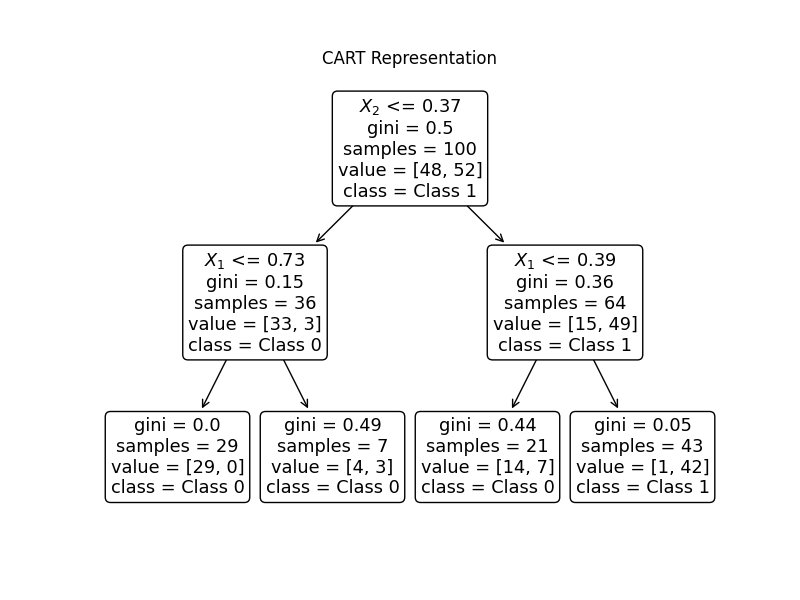

In [1]:
from IPython.display import Image, display
display(Image(filename='../img/Classification CART Representation.jpg', width=500, height=300))

### Prediction Process on Unseen Dataset

To classify a new dataset, CART begins at the root node and applies the conditions at each node based on the feature values of the input. The data point follows the path determined by the conditions until it reaches a leaf node, where the class label at that leaf is assigned as the prediction.

Consider this example based on the provided illustration. Let's assume we have a data point (0.3, 0.4). First, the tree evaluates feature 2 by comparing its value to 0.37. Since 0.4 is greater than 0.37, this results in a "No" to the condition $ x_2 \leq 0.37 $. Consequently, the tree moves to the left child node. At this node, the tree assesses feature 1 by comparing its value to 0.73. Given that 0.3 is less than 0.73, this results in a "Yes" to the condition $x_1 \leq 0.73$. The point then proceeds to the right child node. As this node is a leaf node, the class label for this data point is determined to be the class of the leaf node, which is class 0.

### Loss

The loss function that defines how well the classification CART model predicts the class label is the average $ 0\!-\!1 $ loss:

$$ L_{S}(h) = \frac{1}{m} \sum\limits_{(\mathbf{x},y) \in S} (y \neq h(\mathbf{x})) $$

The average $ 0\!-\!1 $ loss is the proportion of misclassified points in the training set.

### Optimizer

The optimization of CART includes tree **generating** and **pruning**.

#### Tree Generating

CART uses a greedy approach to split the data with the help of Gini index criterion. It is composed of the following steps.

 1. Firstly, we begin with the root of tree, which is the entire dataset, treating each fearture-value pair as a potential splitting point.

 2. Based on Gini impurity, we obtain Gain, or impurity decrease for every potential splits.

 3. We can then select the the splitting point that leads to largest Gain. Based on the chosen attribute and the threshold value, we split dataset into two subsets, which becomes the two child nodes.

 4. After that, we apply the steps 2 and 3 for each new node we obtained. For the new node, we will not consider the feature-value pair we already splitted on.

 5. Once a stopping condition is met, the node becomes a leaf and stops splitting further. The stopping conditions are:
    - All data points in this node belongs to the same label class.
    - No data in this node.
    - Reaches maximum depth.
    - Run out of split points.
    - (Optional) Further split doesn't yield enough reductions in Gini impurity. This is pre-pruning.

 6. The predicted class at a leaf node is the majority class of the samples within that node:
   $$ \text{Prediction} = \arg \max_k p_k $$
   where $ p_k $ is the proportion of samples of class $ k $ in the leaf node.

**Process for Spliiting (steps 2 and 3)**:
 - **Data Splitting**: Each internal node tests a feature $x_j$ against a threshold t, dividing the dataset $ S $ into two subsets:
   $$ \text{Left subset: } S_{left} = \{(x, y) \in S :  = x_j \geq t\} $$
   $$ \text{Right subset: } S_{right} = \{(x, y) \in S : x_j < t\} $$
   where $x$ represents the feature vector, and $y$ represents the target class label.

 - **Impurity Measure**: Each split aims to improve the “purity” of the subsets by using Gini impurity as a measure of impurity. For a node containg dataset $ S $, the Gini impurity $ G(S) $ is calculated as:
   $$ G(S) = 1 - \sum_{k=1}^{K} p_k^2 $$
   where $ p_k $ is the proportion of instances in node $ t $ belonging to class $ k $, and $ K $ is the total number of classes.

 - **Gain Calculation**: The Gain from splitting the parent node containing dataset $S$ into left child node containing $ S_{left} $ and right child node containing $ S_{right} $ is:
   $$ \text{Gain}(S) = G(S) - \frac{|S_{left}|}{|S|} G(S_{left}) - \frac{|S_{right}|}{|S|} G(S_{right}) $$
   where $ G(S) $ is the impurity of the parent node, $ G(S_{left}) $ and $ G(S_{right}) $ are the impurities of the child nodes, and $ |S_{left}| $, $ |S_{\text{right}}| $, and $ |S| $ are their respective sizes.

 - **Gain Comparing**: After gain for all splitting point is computed, CART selects the split (feature and threshold) that maximizes the **impurity reduction (Gain)**.

#### Tree Prunning

To prevent overfitting of the data, pruning is a technique used to remove the nodes that contribute little to the model accuracy. Decision tree’s complexity is defined as the number of splits in the tree. Trees with fewer branches are recommended as they are simple to grasp and less prone to cluster the data. Working through each leaf node in the tree and evaluating the effect of deleting it using a hold-out test set is the quickest and simplest pruning approach.

Steps for Pruning:

 - Start with the fully grown tree.

 - Compute the cost complexity measure for each subtree (subtree error + complexity penalty).

 - Remove the subtree with the smallest improvement in the cost function until further pruning leads to increased error on a validation set or until a desired tree size is reached.

### CART Algorithm in Pseudo-code

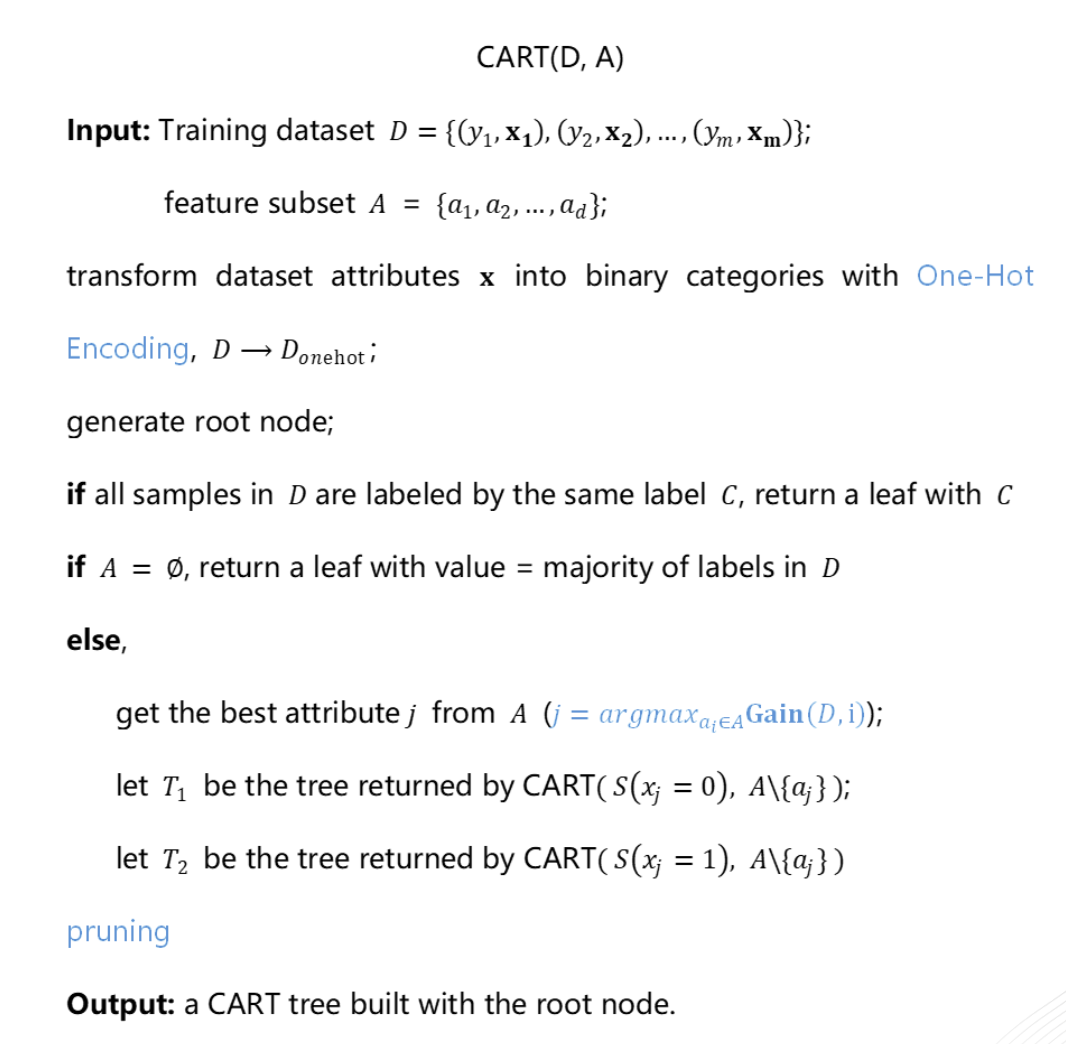

In [2]:
display(Image(filename='../img/Pseudo-code.png', width=500))

## CART Model

In [3]:
import numpy as np

def binary_categorization(yX: np.ndarray): # Used while testing. There is a internal to_one_hot function in DecisionTree class
    '''
    This function is used to convert the attributes in the dataset to binary attributes.
    '''
    y = yX[:, 0]
    X = yX[:, 1:]

    n_attributes = X.shape[1]
    n_instances = X.shape[0]

    listx = []
    for attribute in range(n_attributes):
        listx.append(list(set(X[:, attribute])))

    binary_attributes = np.empty((0, n_instances))
    for i in range(n_attributes):
        for j in listx[i][:-1]:
            att = (X[:, i] <= j)
            binary_attributes = np.vstack((binary_attributes, att))

    binary_attributes = np.vstack((y, binary_attributes))
    return listx, binary_attributes.T

def node_score_gini(y: list):
    '''
    This function is used to calculate the gini score for the node.
    '''
    classes = list(set(y))
    gini = 1
    for i in classes:
        prob = y.count(i) / len(y)
        gini -= prob ** 2
    return gini

def node_score_entropy(y: list):
    '''
    This function is used to calculate the entropy score for the node.
    '''
    classes = list(set(y))
    entropy = 0
    for i in classes:
        prob = y.count(i) / len(y)
        entropy -= prob * np.log(prob)
    return entropy

class Node:

    def __init__(self, left=None, right=None, depth=0, index_split_on=0, isleaf=False, label=1):
        self.left = left
        self.right = right
        self.depth = depth
        self.index_split_on = index_split_on
        self.isleaf = isleaf
        self.label = label
        self.info = {} # used for visualization

    def _set_info(self, gain, num_samples):
        ''' 
        Helper function to add to info attribute.
        '''
        self.info['gain'] = gain
        self.info['num_samples'] = num_samples

class CARTClassifier:

    def __init__(self, data, validation_data=None, gain_function=node_score_gini, max_depth=100):

        self.list_of_categories = [] # used to memorize the categories of the attributes

        # binary categorization
        one_hot_data = self.binary_categorization(data)


        y = [row[0] for row in one_hot_data]
        self.classes = list(set(y))
        self.majority_class = max(self.classes, key=y.count)

        self.max_depth = max_depth
        self.root = Node(label = self.majority_class)
        self.gain_function = gain_function

        indices = list(range(1, len(one_hot_data[0])))

        self._split_recurs(self.root, one_hot_data, indices)

        # Pruning
        if validation_data is not None:
            self._prune_recurs(self.root, validation_data)

    def binary_categorization(self, yX: np.ndarray):
        ''' 
        This function is used to convert the attributes in the dataset to binary attributes.
        '''
        y = yX[:, 0]
        X = yX[:, 1:]

        n_attributes = X.shape[1]
        n_instances = X.shape[0]
        one_hot_attributes = np.empty((0, n_instances))

        if self.list_of_categories == []:
            for attribute in range(n_attributes):
                self.list_of_categories.append(list(set(X[:, attribute])))

        for i in range(n_attributes):
            for j in self.list_of_categories[i][:-1]:
                att = (X[:, i] <= j)
                one_hot_attributes = np.vstack((one_hot_attributes, att))

        one_hot_attributes = np.vstack((y, one_hot_attributes))
        return one_hot_attributes.T

    def predict(self, features):
        ''' 
        Helper function to predict the label given a row of features.
        '''
        return self._predict_recurs(self.root, features)

    def predict_vec(self, data):
        ''' 
        Helper function to predict the label given a dataset.
        '''
        onr_hot_data = self.binary_categorization(data)

        return [self.predict(row) for row in onr_hot_data]

    def accuracy(self, data):
        ''' 
        Helper function to calculate the accuracy on the given data.
        '''
        return 1 - self.loss(data)

    def loss(self, data):
        ''' 
        Helper function to calculate the loss on the given data.
        '''
        one_hot_data = self.binary_categorization(data)

        cnt = 0.0
        test_Y = [row[0] for row in one_hot_data]
        for i in range(len(one_hot_data)):
            prediction = self.predict(one_hot_data[i])
            if (prediction != test_Y[i]):
                cnt += 1.0
        return cnt/len(one_hot_data)

    def _predict_recurs(self, node, row):
        ''' 
        Helper function to predict the label given a row of features.
        Traverse the tree until leaves to get the label.
        '''
        if node.isleaf or node.index_split_on == 0:
            return node.label
        split_index = node.index_split_on
        if not row[split_index]:
            return self._predict_recurs(node.left, row)
        else:
            return self._predict_recurs(node.right, row)

    def _prune_recurs(self, node, validation_data):
        ''' 
        Prune the tree bottom up recursively.
        '''
        if not node.isleaf:
            if node.left is not None:
                self._prune_recurs(node.left, validation_data)

            if node.right is not None:
                self._prune_recurs(node.right, validation_data)

            if (node.left.isleaf) and (node.right.isleaf):
                original_loss = self.loss(validation_data)
                original_label = node.label
                left = node.left
                right = node.right

                node.isleaf = True
                node.left = None
                node.right = None
                loss = self.loss(validation_data)
                if original_loss < loss:
                    node.isleaf = False
                    node.label = original_label
                    node.left = left
                    node.right = right
        return

    def _is_terminal(self, node, data, indices):
        ''' 
        Helper function to determine whether the node should stop splitting.
        '''
        y = [row[0] for row in data]

        is_terminal = node.isleaf
        if len(data) == 0 or len(indices) == 0 or len(set(y)) == 1 or node.depth == self.max_depth:
            is_terminal = True

        if len(data) == 0:
            label = self.majority_class
        else:
            label = max(list(set(y)), key=y.count)

        return is_terminal, label

    def _split_recurs(self, node, data, indices):
        ''' 
        Recursively split the node based on the rows and indices given.
        '''
        is_terminal, label = self._is_terminal(node, data, indices)
        node.label = label

        if is_terminal:
            node.isleaf = True
            node.left = None
            node.right = None
            return

        if not node.isleaf:
            best_gain = -float('inf')
            best_index = None

            for index in indices:
                gain = self._calc_gain(data, index, self.gain_function)
                if gain > best_gain:
                    best_gain = gain
                    best_index = index

            node.index_split_on = best_index
            indices.remove(best_index)
            node._set_info(best_gain, len(data))

            left_data = [row for row in data if row[best_index] == 0]
            right_data = [row for row in data if row[best_index] == 1]

            node.left = Node(depth=node.depth + 1)
            node.right = Node(depth=node.depth + 1)

            self._split_recurs(node.left, left_data, indices)
            self._split_recurs(node.right, right_data, indices)

    def _calc_gain(self, data, split_index, gain_function=node_score_gini):
        ''' 
        Calculate the gain of the proposed splitting and return it.
        '''
        y = [row[0] for row in data]
        xi = [row[split_index] for row in data]
        y_x0 = [row[0] for row in data if row[split_index] == 0]
        y_x1 = [row[0] for row in data if row[split_index] == 1]

        if len(y) != 0 and len(xi) != 0:
            Px1 = xi.count(1) / len(xi)
            Px0 = xi.count(0) / len(xi)

            gain = gain_function(y) - (Px0 * gain_function(y_x0) + Px1 * gain_function(y_x1))

        else:
            gain = 0

        return gain

    def print_tree(self):
        ''' 
        Helper function for tree_visualization.
        '''
        print('---START PRINT TREE---')
        def print_subtree(node, indent=''):
            if node is None:
                return str("None")
            if node.isleaf:
                return str(node.label)
            else:
                decision = 'split attribute = {:d}; gain = {:f}; number of samples = {:d}'.format(node.index_split_on, node.info['gain'], node.info['num_samples'])
            left = indent + '0 -> '+ print_subtree(node.left, indent + '\t\t')
            right = indent + '1 -> '+ print_subtree(node.right, indent + '\t\t')
            return (decision + '\n' + left + '\n' + right)

        print(print_subtree(self.root))
        print('----END PRINT TREE---')

    def loss_plot_vec(self, data):
        ''' 
        Helper function to visualize the loss when the tree expands.
        '''
        self._loss_plot_recurs(self.root, data, 0)
        loss_vec = []
        q = [self.root]
        num_correct = 0
        while len(q) > 0:
            node = q.pop(0)
            num_correct = num_correct + node.info['curr_num_correct']
            loss_vec.append(num_correct)
            if node.left != None:
                q.append(node.left)
            if node.right != None:
                q.append(node.right)

        return 1 - np.array(loss_vec)/len(data)

    def _loss_plot_recurs(self, node, rows, prev_num_correct):
        ''' 
        Helper function to visualize the loss when the tree expands.
        '''
        labels = [row[0] for row in rows]
        curr_num_correct = labels.count(node.label) - prev_num_correct
        node.info['curr_num_correct'] = curr_num_correct

        if not node.isleaf:
            left_data, right_data = [], []
            left_num_correct, right_num_correct = 0, 0
            for row in rows:
                if not row[node.index_split_on]:
                    left_data.append(row)
                else:
                    right_data.append(row)

            left_labels = [row[0] for row in left_data]
            left_num_correct = left_labels.count(node.label)
            right_labels = [row[0] for row in right_data]
            right_num_correct = right_labels.count(node.label)

            if node.left != None:
                self._loss_plot_recurs(node.left, left_data, left_num_correct)
            if node.right != None:
                self._loss_plot_recurs(node.right, right_data, right_num_correct)


## Data Preprocessing

### Import Packages

In [4]:
import pandas as pd
import numpy as np
import random
import pytest
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # just to ignore warnings

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Helper Functions Used In Data Preprocessing

In [5]:
def plot_categorical_distributions(df, ncols=3, figsize_per_plot=(3.5, 3.5), palette="Set3"):
    '''
    Helper function used to plot the distributions of categorical variables.
    '''
    num_cols = len(df.columns)
    nrows = -(-num_cols // ncols)  

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * figsize_per_plot[0], nrows * figsize_per_plot[1]))
    axes = axes.flatten() if nrows > 1 else [axes]

    for i, col_name in enumerate(df.columns):
        ax = axes[i]
        sns.countplot(x=col_name, hue=col_name, data=df, palette=palette, ax=ax)
        ax.set_title(f"Distribution of - {col_name}", fontsize=10)
        ax.set_xlabel(f"Category - {col_name}", fontsize=10)
        ax.set_ylabel("Count", fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

def plot_heatmap(data, exclude_columns=None, figsize=(10, 8), cmap='coolwarm'):
    ''' 
    Helper function used to calculate the Cramér's V for each pair of categorical columns
    and generates a heatmap of Cramér's V correlations for categorical columns in a DataFrame.
    '''
    if exclude_columns:
        categorical_columns = data.drop(columns=exclude_columns)
    else:
        categorical_columns = data
        
    cramers_v_matrix = pd.DataFrame(
        np.zeros((categorical_columns.shape[1], categorical_columns.shape[1])),
        index=categorical_columns.columns,
        columns=categorical_columns.columns
    )
    
    for col1 in categorical_columns.columns:
        for col2 in categorical_columns.columns:
            if col1 == col2:
                cramers_v_matrix.loc[col1, col2] = 1.0  
            elif cramers_v_matrix.loc[col1, col2] == 0:
                contingency_table = pd.crosstab(categorical_columns[col1], categorical_columns[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                n = contingency_table.sum().sum()
                k = min(contingency_table.shape) - 1
                cramers_v = np.sqrt(chi2 / (n * k))

                cramers_v_matrix.loc[col1, col2] = cramers_v
                cramers_v_matrix.loc[col2, col1] = cramers_v

    cramers_v_matrix = cramers_v_matrix.astype(float)

    plt.figure(figsize=figsize)
    sns.heatmap(cramers_v_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
    plt.title("Cramér's V Correlation Heatmap of Categorical Features")
    plt.show()

    return cramers_v_matrix

### Transform the Dataset Into A Dataframe.

In [6]:
df = pd.read_csv("../data/car_evaluation.csv", header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [7]:
# Add names for the colomns.
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Encoder

In [8]:
# Drop the column of the output variable.
X = df.drop(columns=['class'], axis=1)

y = df['class']

In [9]:
# Transform the categorical data into numerical format.
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X = encoder.fit_transform(X)
X

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


The function of encoding in the context of categorical variables is to transform non-numeric data into a numerical format that can be utilized by algorithms for analysis, visualization, or machine learning. 

In [10]:
# merge y and X
yX = pd.concat([y, X], axis=1)
display(yX)

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,1,1,1,1,1,1
1,unacc,1,1,1,1,1,2
2,unacc,1,1,1,1,1,3
3,unacc,1,1,1,1,2,1
4,unacc,1,1,1,1,2,2
...,...,...,...,...,...,...,...
1723,good,4,4,4,3,2,2
1724,vgood,4,4,4,3,2,3
1725,unacc,4,4,4,3,3,1
1726,good,4,4,4,3,3,2


This dataset contains a total of 1,728 records, 6 input categorical variables, and 1 output categorical variable.

### Handling Missing Values

In [11]:
# drop all NaN values
display(yX.dropna())

yX_fixed = yX.dropna()

yX_array = yX_fixed.to_numpy()
print(yX_array.shape)

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,1,1,1,1,1,1
1,unacc,1,1,1,1,1,2
2,unacc,1,1,1,1,1,3
3,unacc,1,1,1,1,2,1
4,unacc,1,1,1,1,2,2
...,...,...,...,...,...,...,...
1723,good,4,4,4,3,2,2
1724,vgood,4,4,4,3,2,3
1725,unacc,4,4,4,3,3,1
1726,good,4,4,4,3,3,2


(1728, 7)


After filtering out rows with missing values, we found that the data volume remains unchanged. This indicates that the dataset has no missing values and is highly complete and well-prepared.

**Cart can handle missing values itself!**

Usually, we use techniques such as simply deleting the rows or performing imputations to handle missing values. However, CART has a unique way of handling missing data by making use of surrogate splits:

During surrogate splitting, if a value is missing for the feature selected for the primary split, CART identifies other features that are highly correlated with the primary splitting feature. These surrogate features serve as backups to make the splitting decision when the primary feature is unavailable. Surrogate splits are ranked based on how well they mimic the primary split. If the first surrogate split is unavailable, CART moves to the next best surrogate, and so on.
 
 
This mechanism allows CART to process instances with missing values without discarding them or requiring prior imputation.

### Distribution Visualization

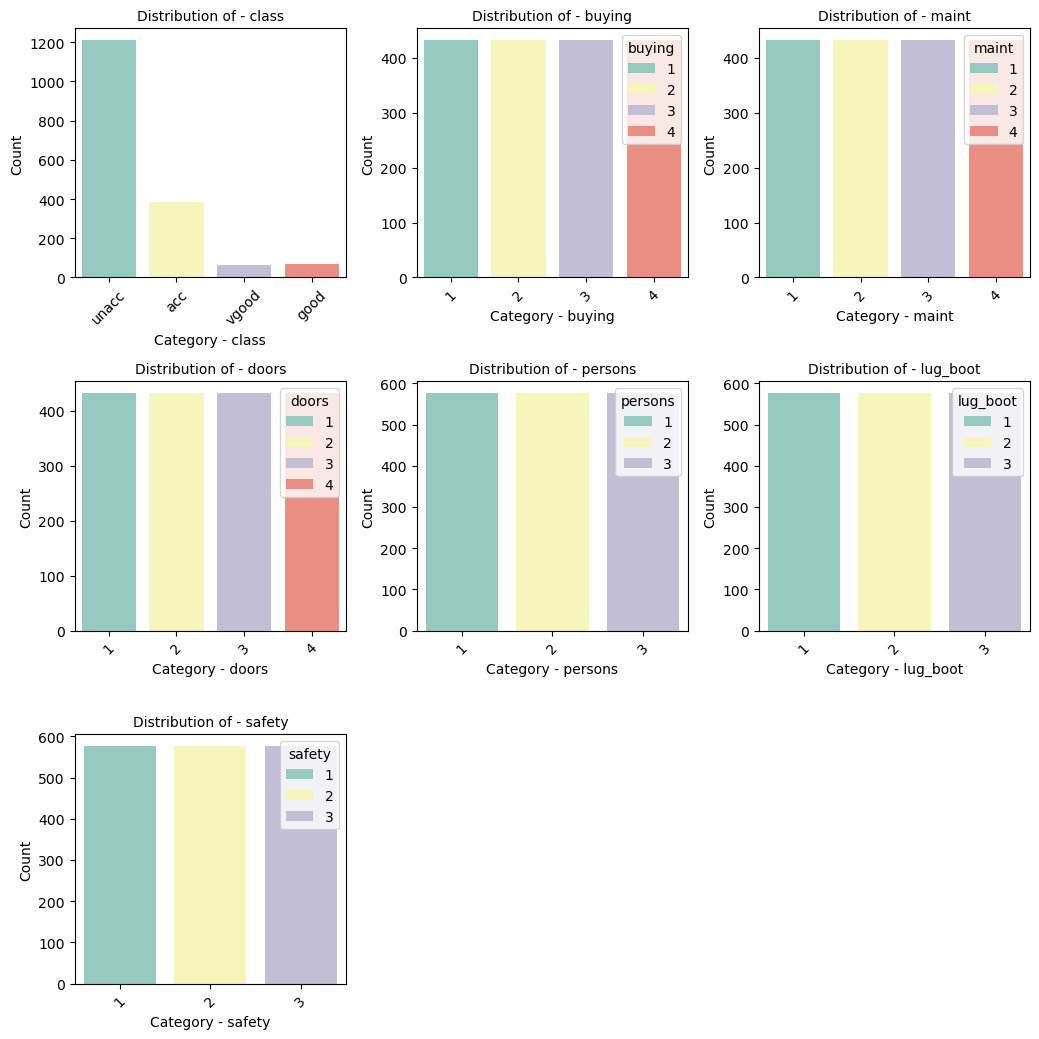

In [12]:
plot_categorical_distributions(yX)

The plot shows the distribution of input and output variables.

**Inputs: Evenly Distributed**

Each input categorical variable appears to have nearly uniform distributions across its categories. They acount for exactly $\frac{1}{4}$ or $\frac{1}{3}$ in the class. This uniformity suggests no significant bias in the dataset regarding these variables.

**Outputs: Imbalanced**

The 'unacc' category dominates the class, accounting for 70% in the class, which means the class heavily skew tawards this category.

### Correlation Analysis

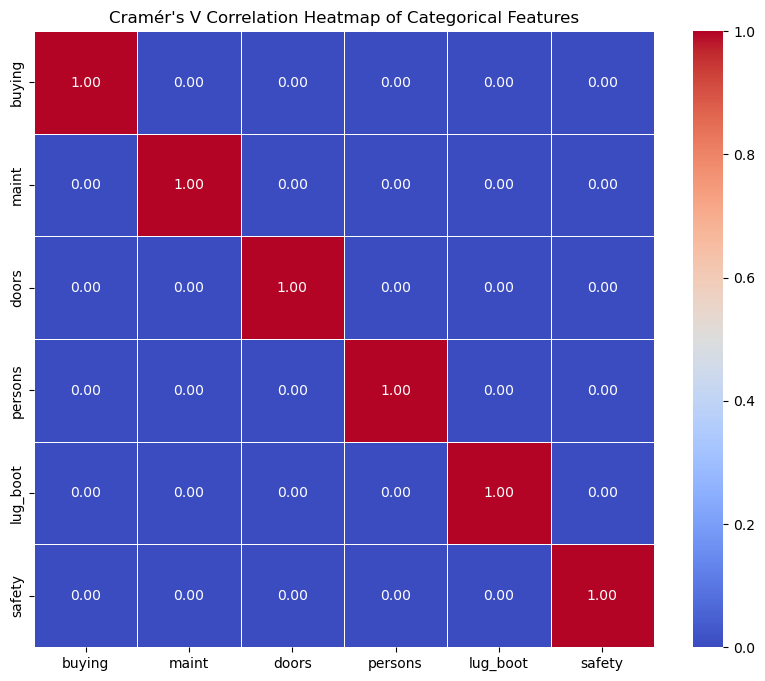

In [13]:
correlation_matrix = plot_heatmap(yX, exclude_columns=['class'])

We used Cramér's V to perform correlation analysis.

**Cramér's V** is a statistical measure used to determine the strength of association between two categorical variables. It is derived from the Chi-Square statistic, ranging from 0 to 1:

 - 0 indicates no association (independence).

 - 1 indicates a perfect association.

The formula is as written as: $$V = \sqrt{\frac{\chi^2}{n \cdot k}}$$ where:
 - $\chi^2$: the Chi-Square statistic calculated from the contingency table of the two variables

 - n: the total number of observations in the dataset.

 - k: the number of categories.

From the heatmap, we find that all the correlation values are nearly 0 (except for self-correlation, which is 1), it indicates that there is no significant association between any pair of categorical variables in the dataset. 

This result shows that variables are independent of one another with respect to their even distributions, and all of the categories should be equally considered during the training process.

## Main

In this section we tried 2 different configurations with the hyperparameters to reproduce the previous work and to make adjustment on the hyperparameters.

### Reproduce the Previous Work

(The link to the previou work we are reproducing: https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook)

To reproduce, we set the exact same hyperparameters as those in the link article. The `test_size` and `random_state` of the `train_test_split` is 0.33 and 42. The `max_depth` of the CART is 3. 

In [14]:
# Split the data into training and testing sets
train, test = train_test_split(yX_array, test_size=0.33, random_state=42)

# Train the model
cart_model = CARTClassifier(train, max_depth=3)

# Generate predictions
y_true = test[:, 0]
y_pred = cart_model.predict_vec(test)

# Print the confusion matrix and classification report
print("=" * 20 + ' Confusion Matrix ' + "=" * 20 + '\n')
print(confusion_matrix(test[:, 0], cart_model.predict_vec(test)))
print("=" * 20 + ' Classification Report ' + "=" * 20 + '\n')
print(classification_report(test[:, 0], cart_model.predict_vec(test)))

# Calculate Custom Accuracy
custom_accuracy = cart_model.accuracy(test)
print("=" * 20 + ' Custom CART Accuracy ' + "=" * 20 + '\n')
print(f'Custom CART Accuracy: {custom_accuracy * 100:.2f}%')

==================== Confusion Matrix ====================

[[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]
==================== Classification Report ====================

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571

==================== Custom CART Accuracy ====================

Custom CART Accuracy: 80.21%


In [15]:
# Print the tree
cart_model.print_tree()

---START PRINT TREE---
split attribute = 14; gain = 0.070073; number of samples = 1157
0 -> split attribute = 10; gain = 0.147689; number of samples = 771
		0 -> split attribute = 2; gain = 0.058023; number of samples = 525
				0 -> acc
				1 -> unacc
		1 -> unacc
1 -> unacc
----END PRINT TREE---


### Results Comparison

In this section, we compare the performance of our custom CART implementation with Scikit-Learn's `DecisionTreeClassifier`. The comparison focuses on reproducing the same approach and achieving identical results.

**a. Classification Reports**

Scikit-Learn `DecisionTreeClassifier` (`max_depth=3`):

| Class  | Precision | Recall | F1-Score | Support |
|--------|-----------|--------|----------|---------|
| acc    | 0.56      | 0.57   | 0.56     | 129     |
| good   | 0.00      | 0.00   | 0.00     | 20      |
| unacc  | 0.87      | 0.97   | 0.92     | 397     |
| vgood  | 0.00      | 0.00   | 0.00     | 25      |
| **Accuracy** |       |        | **0.80** | **571** |
| **Macro Avg** | 0.36 | 0.38 | 0.37 | 571 |
| **Weighted Avg** | 0.73 | 0.80 | 0.77 | 571 |

Our CART Implementation (`max_depth=3`):

| Class  | Precision | Recall | F1-Score | Support |
|--------|-----------|--------|----------|---------|
| acc    | 0.56      | 0.57   | 0.56     | 129     |
| good   | 0.00      | 0.00   | 0.00     | 20      |
| unacc  | 0.87      | 0.97   | 0.92     | 397     |
| vgood  | 0.00      | 0.00   | 0.00     | 25      |
| **Accuracy** |       |        | **0.80** | **571** |
| **Macro Avg** | 0.36 | 0.38 | 0.37 | 571 |
| **Weighted Avg** | 0.73 | 0.80 | 0.77 | 571 |

**b. Accuracy Scores**

| Metric       | Scikit-Learn `DecisionTreeClassifier` | Our CART Implementation |
|--------------|----------------------------------------|-------------------------|
| **Accuracy** | 80.21%                                 | 80.21%                  |


**c. Confusion Matrices**

Scikit-Learn `DecisionTreeClassifier` (`max_depth=3`):

|          | Predicted acc | Predicted good | Predicted unacc | Predicted vgood |
|----------|---------------|----------------|-----------------|-----------------|
| **acc**     | 73            | 0              | 56              | 0               |
| **good**    | 0             | 0              | 0               | 0               |
| **unacc**   | 12            | 0              | 385             | 0               |
| **vgood**   | 25            | 0              | 0               | 0               |

Our CART Implementation (`max_depth=3`):

|          | Predicted acc | Predicted good | Predicted unacc | Predicted vgood |
|----------|---------------|----------------|-----------------|-----------------|
| **acc**     | 73            | 0              | 56              | 0               |
| **good**    | 0             | 0              | 0               | 0               |
| **unacc**   | 12            | 0              | 385             | 0               |
| **vgood**   | 25            | 0              | 0               | 0               |

**Visual Insights**

- **Classification Reports:** Both models produce identical classification reports, indicating that precision, recall, and F1-scores for each class are consistent across both implementations.

- **Confusion Matrices:** The identical confusion matrices demonstrate that both models make the same predictions for each class, reinforcing the accuracy of our custom CART implementation.

- **Accuracy Scores:** Both models achieve an **accuracy of 80.21%**, confirming that our implementation reliably mirrors Scikit-Learn's `DecisionTreeClassifier`.

**Conclusion:**

The seamless alignment between our custom CART implementation and Scikit-Learn's `DecisionTreeClassifier` in both classification reports and confusion matrices confirms the correctness and reliability of our algorithm. Achieving an identical accuracy of **80.21%** underscores the effectiveness of our implementation in mirroring established standards.

### Small Adjustment

Because it is abnormal to set the `max_depth` as 3 in practice, we decided to re-run the model, set `max_depth` as 1000 and keep the other hyperparameters to see the result. (It is also the result we put on our slides.) 

This result seems much better and reasonable than the previous work.

In [16]:
# Split the data into training and testing sets
train, test = train_test_split(yX_array, test_size=0.33, random_state=42)

# Train the model
cart_model = CARTClassifier(train, max_depth=1000)

# Print the confusion matrix and classification report
print("=" * 20 + ' Confusion Matrix ' + "=" * 20 + '\n')
print(confusion_matrix(test[:, 0], cart_model.predict_vec(test)))
print("=" * 20 + ' Classification Report ' + "=" * 20 + '\n')
print(classification_report(test[:, 0], cart_model.predict_vec(test)))

==================== Confusion Matrix ====================

[[ 62  11  56   0]
 [  8  11   0   1]
 [ 11   1 385   0]
 [ 17   1   0   7]]
==================== Classification Report ====================

              precision    recall  f1-score   support

         acc       0.63      0.48      0.55       129
        good       0.46      0.55      0.50        20
       unacc       0.87      0.97      0.92       397
       vgood       0.88      0.28      0.42        25

    accuracy                           0.81       571
   macro avg       0.71      0.57      0.60       571
weighted avg       0.80      0.81      0.80       571



In [17]:
# Print the tree
cart_model.print_tree()

---START PRINT TREE---
split attribute = 14; gain = 0.070073; number of samples = 1157
0 -> split attribute = 10; gain = 0.147689; number of samples = 771
		0 -> split attribute = 2; gain = 0.058023; number of samples = 525
				0 -> split attribute = 6; gain = 0.093667; number of samples = 254
						0 -> split attribute = 15; gain = 0.108550; number of samples = 64
								0 -> split attribute = 12; gain = 0.220277; number of samples = 34
										0 -> split attribute = 7; gain = 0.109675; number of samples = 23
												0 -> split attribute = 8; gain = 0.017188; number of samples = 16
														0 -> vgood
														1 -> split attribute = 3; gain = 0.120000; number of samples = 5
																0 -> split attribute = 11; gain = 0.500000; number of samples = 2
																		0 -> vgood
																		1 -> good
																1 -> vgood
												1 -> split attribute = 13; gain = 0.489796; number of samples = 7
														0 -> vgood
														1 -> good
						

## Unit Test

### Test Model 1

In [18]:
np.random.seed(0)
random.seed(0)

# Tests for node_score_gini with binary class
assert node_score_gini([1,1,1,1,1]) == node_score_gini([0,0,0,0,0]) == 0
assert node_score_gini([1,1,0,0,0]) == .48

# Creates Test Model and Dummy Data
x1 = np.array(([[1, 1, 0, 3], [1, 4, 1, 2], [1, 4, 1, 0], [0, 1, 0, 1], [0, 2, 1, 1], [1, 4, 0, 0]]))
test_model1 = CARTClassifier(x1)

# Test for majority_class
assert test_model1.majority_class == 1

# Tests for _is_terminal (threshold are values, if value<=threshold then to the left child)
test1_node1 = Node(left=None, right=None, depth=0, index_split_on=2, isleaf=False, label=1)
test1_node2 = Node(left=None, right=None, depth=1, index_split_on=None, isleaf=True, label=1)
test1_node3 = Node(left=None, right=None, depth=1, index_split_on=5, isleaf=False, label=0)
test1_node4 = Node(left=None, right=None, depth=2, index_split_on=None, isleaf=True, label=1)
test1_node5 = Node(left=None, right=None, depth=2, index_split_on=None, isleaf=True, label=0)

x1_one_hot = np.array([[1,1,1,1,0,0,0],
                       [1,0,0,0,0,0,1],
                       [1,0,0,0,1,1,1],
                       [0,1,1,1,0,1,1],
                       [0,0,1,0,0,1,1],
                       [1,0,0,1,1,1,1]]
)
x1_filtered_node2 = np.array([row for row in x1_one_hot if row[2] == 0])
x1_filtered_node3 = np.array([row for row in x1_one_hot if row[2] == 1])
x1_filtered_node4 = np.array([row for row in x1_filtered_node3 if row[5] == 0])
x1_filtered_node5 = np.array([row for row in x1_filtered_node3 if row[5] == 1])

assert test_model1._is_terminal(node=test1_node1, data=x1_one_hot, indices=[1,2,3,4,5,6]) == (False, 1)
assert test_model1._is_terminal(node=test1_node2, data=x1_filtered_node2, indices=[1,3,4,5,6]) == (True, 1)
assert test_model1._is_terminal(node=test1_node3, data=x1_filtered_node3, indices=[1,3,4,5,6]) == (False, 0)
assert test_model1._is_terminal(node=test1_node4, data=x1_filtered_node4, indices=[1,3,4,6]) == (True, 1)
assert test_model1._is_terminal(node=test1_node5, data=x1_filtered_node5, indices=[1,3,4,6]) == (True, 0)

# Tests _calc_gain
x1_original_node3 = np.array([row for row in x1 if row[2] == 1])
# Testing gain for index 2 in root, which is the max gain when splitting x1
assert test_model1._calc_gain(x1_one_hot, 2, node_score_gini) == pytest.approx(0.222, .01)
# Testing gain for index 5 in node3, which is the max gain when splitting data in node 3
assert test_model1._calc_gain(x1_filtered_node3, 5, node_score_gini) == pytest.approx(0.444, .01)

# Check Tree is created Properly, Compare with text below
test_model1.print_tree()

# Tests _prune_recurs
# Pruned tree should be smaller
# with higher training loss and lower validation loss
# The third feature of the second point in x_val1 is 5, which does not exist in our training set. We should still be able to classify it.
x_val1 = np.array([[1,4,0,2],[0,2,1,5]])

print('training loss not pruned:', test_model1.loss(x1))
print('validation loss not pruned:', test_model1.loss(x_val1), '\n')

test_model1_pruned = CARTClassifier(x1,validation_data=x_val1)
test_model1_pruned.print_tree()
print('training loss pruned:', test_model1_pruned.loss(x1))
print('validation loss pruned:', test_model1_pruned.loss(x_val1))

---START PRINT TREE---
split attribute = 2; gain = 0.222222; number of samples = 6
0 -> 1.0
1 -> split attribute = 5; gain = 0.444444; number of samples = 3
		0 -> 1.0
		1 -> 0.0
----END PRINT TREE---
training loss not pruned: 0.0
validation loss not pruned: 0.5 

---START PRINT TREE---
split attribute = 2; gain = 0.222222; number of samples = 6
0 -> 1.0
1 -> 0.0
----END PRINT TREE---
training loss pruned: 0.16666666666666666
validation loss pruned: 0.0


### Test Model 2

In [19]:
# Tests for node_score_gini with multiclass
assert node_score_gini([0,0,0,0,0]) == node_score_gini([1,1,1,1,1]) == node_score_gini([2,2,2,2,2]) == 0
assert node_score_gini([1,1,0,0,2]) == pytest.approx(.64, .01)

# Creates Test Model and Dummy Data
x2 = np.array([[1, 1, 0, 3], [0, 1, 1, 2], [2, 0, 1, 1], [2, 0, 0, 3],
               [0, 0, 1, 3], [1, 1, 0, 1], [1, 1, 1, 3], [0, 1, 0, 2]])
test_model2 = CARTClassifier(x2)

# Test for majority_class
assert test_model2.majority_class == 0

# Tests for _is_terminal (threshold are values, if value<=threshold then to the left child)
test2_node1 = Node(left=None, right=None, depth=0, index_split_on=1, isleaf=False, label=0)
test2_node2 = Node(left=None, right=None, depth=1, index_split_on=4, isleaf=False, label=1)
test2_node3 = Node(left=None, right=None, depth=1, index_split_on=2, isleaf=False, label=2)
test2_node4 = Node(left=None, right=None, depth=2, index_split_on=None, isleaf=True, label=1)
test2_node5 = Node(left=None, right=None, depth=2, index_split_on=3, isleaf=False, label=0)
test2_node6 = Node(left=None, right=None, depth=2, index_split_on=3, isleaf=False, label=0)
test2_node7 = Node(left=None, right=None, depth=2, index_split_on=None, isleaf=True, label=2)
test2_node8 = Node(left=None, right=None, depth=3, index_split_on=None, isleaf=True, label=0)
test2_node9 = Node(left=None, right=None, depth=3, index_split_on=None, isleaf=True, label=1)
test2_node10 = Node(left=None, right=None, depth=3, index_split_on=None, isleaf=True, label=0)
test2_node11 = Node(left=None, right=None, depth=3, index_split_on=None, isleaf=True, label=2)

x2_one_hot = np.array([[1,0,1,0,0],
                       [0,0,0,0,1],
                       [2,1,0,1,1],
                       [2,1,1,0,0],
                       [0,1,0,0,0],
                       [1,0,1,1,1],
                       [1,0,0,0,0],
                       [0,0,1,0,1]]
)
x2_filtered_node2 = np.array([row for row in x2_one_hot if row[1] == 0])
x2_filtered_node3 = np.array([row for row in x2_one_hot if row[1] == 1])
x2_filtered_node4 = np.array([row for row in x2_filtered_node2 if row[4] == 0])
x2_filtered_node5 = np.array([row for row in x2_filtered_node2 if row[4] == 1])
x2_filtered_node6 = np.array([row for row in x2_filtered_node3 if row[2] == 0])
x2_filtered_node7 = np.array([row for row in x2_filtered_node3 if row[2] == 1])
x2_filtered_node8 = np.array([row for row in x2_filtered_node5 if row[3] == 0])
x2_filtered_node9 = np.array([row for row in x2_filtered_node5 if row[3] == 1])
x2_filtered_node10 = np.array([row for row in x2_filtered_node6 if row[3] == 0])
x2_filtered_node11 = np.array([row for row in x2_filtered_node6 if row[3] == 1])

assert test_model2._is_terminal(node=test2_node1, data=x2_one_hot, indices=[1,2,3,4]) == (False, 0)
assert test_model2._is_terminal(node=test2_node2, data=x2_filtered_node2, indices=[2,3,4]) == (False, 1)
assert test_model2._is_terminal(node=test2_node3, data=x2_filtered_node3, indices=[2,3,4]) == (False, 2)

assert test_model2._is_terminal(node=test2_node4, data=x2_filtered_node4, indices=[2,3]) == (True, 1)
assert test_model2._is_terminal(node=test2_node5, data=x2_filtered_node5, indices=[2,3]) == (False, 0)
assert test_model2._is_terminal(node=test2_node6, data=x2_filtered_node6, indices=[3,4]) == (False, 0)
assert test_model2._is_terminal(node=test2_node7, data=x2_filtered_node7, indices=[3,4]) == (True, 2)
assert test_model2._is_terminal(node=test2_node8, data=x2_filtered_node8, indices=[2]) == (True, 0)
assert test_model2._is_terminal(node=test2_node9, data=x2_filtered_node9, indices=[2]) == (True, 1)
assert test_model2._is_terminal(node=test2_node10, data=x2_filtered_node10, indices=[4]) == (True, 0)

# Tests _calc_gain
# Testing gain for index 1 in x2
assert test_model2._calc_gain(x2, 1, node_score_gini) == pytest.approx(0.18958333, .01)
# Testing gain for index 4 in x2_filtered_node2
assert test_model2._calc_gain(x2_filtered_node2, 4, node_score_gini) == pytest.approx(0.21333, .01)
# Testing gain for index 2 in x2_filtered_node3
assert test_model2._calc_gain(x2_filtered_node5, 2, node_score_gini) == pytest.approx(0.111, .01)

# Check Tree is created Properly, Compare with text below
test_model2.print_tree()

# Tests _prune_recurs
# Pruned tree should be smaller
# with higher training loss and lower validation loss
x_val2 = np.array([[2,0,0,2],[0,1,1,1]])

print('training loss not pruned:', test_model2.loss(x2))
print('validation loss not pruned:', test_model2.loss(x_val2), '\n')

test_model2_pruned = CARTClassifier(x2,validation_data=x_val2)
test_model2_pruned.print_tree()
print('training loss pruned:', test_model2_pruned.loss(x2))
print('validation loss pruned:', test_model2_pruned.loss(x_val2))

---START PRINT TREE---
split attribute = 1; gain = 0.189583; number of samples = 8
0 -> split attribute = 4; gain = 0.213333; number of samples = 5
		0 -> 1.0
		1 -> split attribute = 3; gain = 0.444444; number of samples = 3
				0 -> 0.0
				1 -> 1.0
1 -> split attribute = 2; gain = 0.111111; number of samples = 3
		0 -> 0.0
		1 -> 2.0
----END PRINT TREE---
training loss not pruned: 0.125
validation loss not pruned: 0.5 

---START PRINT TREE---
split attribute = 1; gain = 0.189583; number of samples = 8
0 -> split attribute = 4; gain = 0.213333; number of samples = 5
		0 -> 1.0
		1 -> 0.0
1 -> 2.0
----END PRINT TREE---
training loss pruned: 0.25
validation loss pruned: 0.0


## References

 - Scikit Learn, Decision Tree Classifier. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (Accessed: 8 November 2024)

 - Banerjee, P. (2019) Decision-Tree Classifier Tutorial. Version 4. Kaggle. Available at: https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial (Accessed: 11 December 2024).